In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

from modules.read_spreadsheet import read_file_xlsx
from modules.get_general_informations import get_informations
from modules.plots import save_fig

#Defautl configurations for the plots
plt.close('all')
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["figure.dpi"] = 100
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif'] = ['cmr10']
plt.rcParams['axes.unicode_minus'] = False

In [26]:
# Input and output paths    
path_load = os.getcwd() + '/data/loads/'
path_xlsx = os.getcwd() + '/data/spreadsheets/'
path_dss = os.getcwd() + '/data/dss_files/'	
output_csv = os.getcwd() + '/data/output/csv/'
output_img = os.getcwd() + '/data/output/img/'
path_generators = os.getcwd() + '/data/generators_profiles/'


In [27]:
# Read the data
kind = 'Smoothing'
bess_bus = 1
if  not kind == 'NoOperation':
    load = pd.read_csv(output_csv + 'load/' f'load_{kind}_bus{bess_bus}_year.csv')
    generation = pd.read_csv(output_csv + 'generation/' f'generation_{kind}_bus{bess_bus}_year.csv')
    demand = pd.read_csv(output_csv + 'demand/' f'demand_{kind}_bus{bess_bus}_year.csv')
    bess_df = pd.read_csv(output_csv + 'bess/' f'bess_powers_{kind}_bus{bess_bus}_year.csv')
else:
    load = pd.read_csv(output_csv + 'load/' f'load_{kind}_year.csv')
    generation = pd.read_csv(output_csv + 'generation/' f'generation_{kind}_year.csv')
    demand = pd.read_csv(output_csv + 'demand/' f'demand_{kind}_year.csv')
    bess_df = pd.read_csv(output_csv + 'bess/' f'bess_powers_{kind}_year.csv')

# Read the file and
name_spreadsheet = 'teste_sheet.xlsx' # Name of your spreadsheet with parameters of the system in directory data/spreadsheets
file_contents = read_file_xlsx(path_xlsx+name_spreadsheet)
general_informations = file_contents['General']
general_informations = get_informations(general_informations)
date_ini = general_informations.start_date
date_end = general_informations.end_date
interval = general_informations.timestep
time = pd.date_range(date_ini, date_end, freq=str(interval) + 'T')

C:\Users\joao9\AppData\Local\Temp\ipykernel_14952\1709199054.py:23: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time = pd.date_range(date_ini, date_end, freq=str(interval) + 'T')


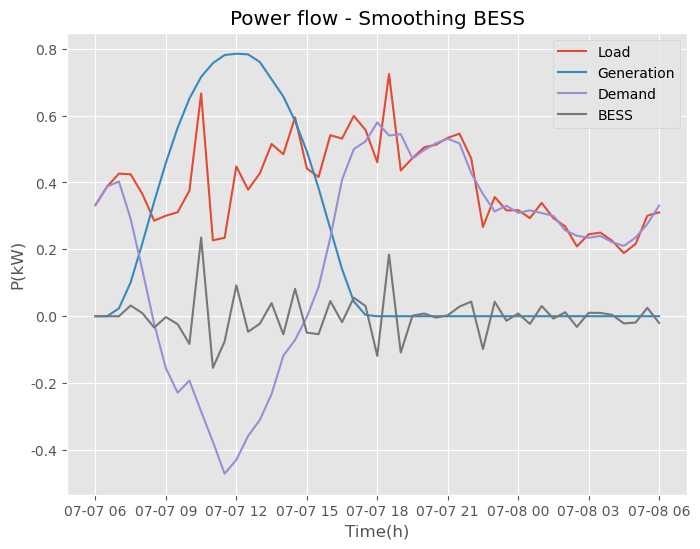

In [28]:
#Extract the timestep from power_df
load = load['P(kW)'][:len(time)]
generation = generation['P(kW)'][:len(time)]
demand_bess = demand['P(kW)'][:len(time)]
bess_power = bess_df.loc[:, 'P(kW)'][:len(time)]

#Plot the data
fig = plt.figure(figsize=(8,6))
plt.title(f'Power flow - {kind} BESS')
plt.plot(time, load, label='Load')
plt.plot(time, generation, label='Generation')
plt.plot(time, demand_bess, label='Demand')
plt.plot(time, bess_power, label='BESS')
plt.legend()
plt.xlabel('Time(h)')
plt.ylabel('P(kW)')
plt.grid(True)

# # Format the x axis to display readable times
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
# plt.minorticks_on()

# save_fig(fig,'power_bess_smoothing',output_img)




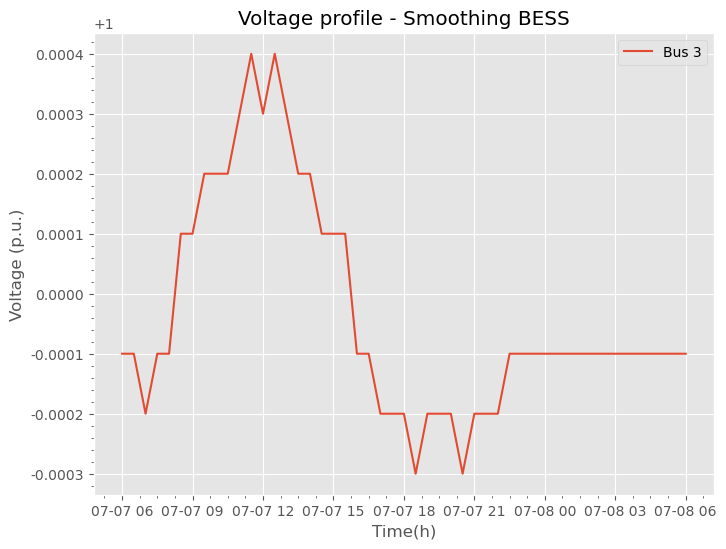

In [29]:
# read the linePU_voltage dataframe
if not kind == 'NoOperation':
    linePU_voltage = pd.read_csv(output_csv + 'bus_voltage/' f'bus_voltage_df_{kind}_bus{bess_bus}_year.csv')
else:
    linePU_voltage = pd.read_csv(output_csv + 'bus_voltage/' f'bus_voltage_df_{kind}_year.csv')

# Extract voltage profile where Bus == source_bus
bus_001 = linePU_voltage.loc[linePU_voltage['Bus'] == 'bus_001', 'Voltage (p.u.)'][:len(time)]
bus_002 = linePU_voltage.loc[linePU_voltage['Bus'] == 'bus_002', 'Voltage (p.u.)'][:len(time)]
bus_003 = linePU_voltage.loc[linePU_voltage['Bus'] == 'bus_003', 'Voltage (p.u.)'][:len(time)]
bus_004 = linePU_voltage.loc[linePU_voltage['Bus'] == 'bus_004', 'Voltage (p.u.)'][:len(time)]
bus_005 = linePU_voltage.loc[linePU_voltage['Bus'] == 'bus_005', 'Voltage (p.u.)'][:len(time)]
fig = plt.figure(figsize=(8,6))
plt.title(f'Voltage profile - {kind} BESS')
# plt.plot(time, bus_001, label='Source Bus')
# plt.plot(time, bus_002, label='Bus 2')
plt.plot(time, bus_003, label='Bus 3')
# plt.plot(time, bus_004, label='Bus 4')
# plt.plot(time, bus_005, label='Bus 5')
plt.xlabel('Time(h)')
plt.ylabel('Voltage (p.u.)')
plt.grid(True)
plt.legend()

# Format the x axis to display readable times
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
plt.minorticks_on()


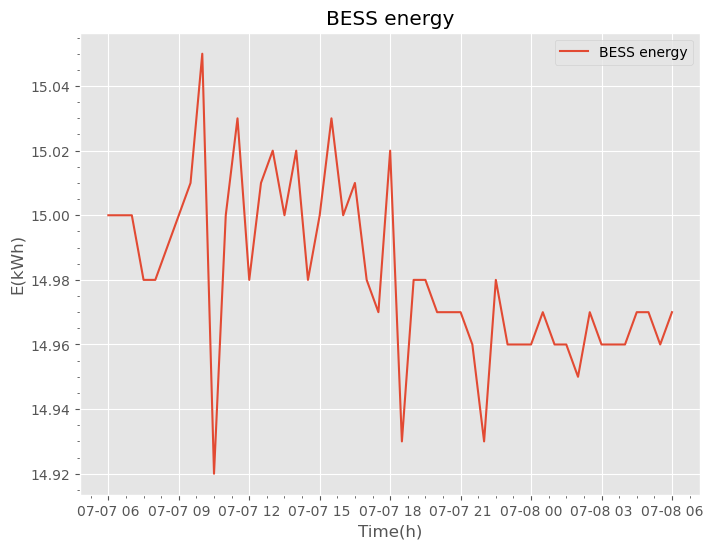

In [30]:
bes_energy = bess_df.loc[:, 'E(kWh)'][:len(time)]

#Plot the data
fig = plt.figure(figsize=(8,6))
plt.title('BESS energy')
plt.plot(time, bes_energy, label='BESS energy')
plt.legend()
plt.xlabel('Time(h)')
plt.ylabel('E(kWh)')
plt.grid(True)

# Format the x axis to display readable times
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
plt.minorticks_on()

# save_fig(fig,'bess_energy_simple',output_img)

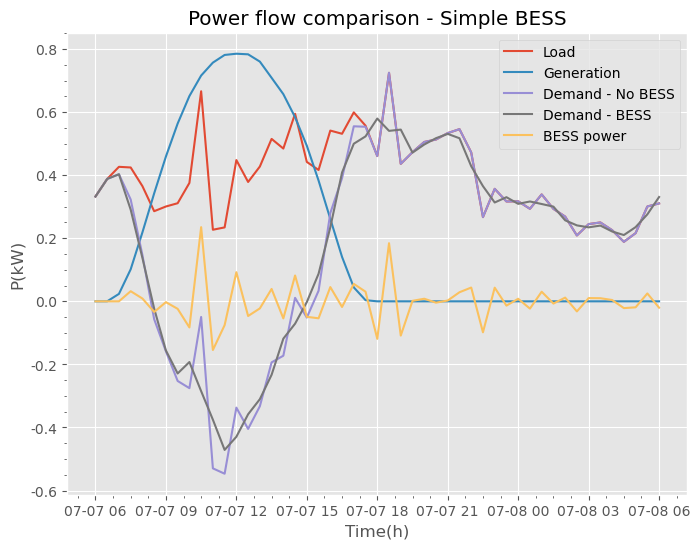

In [31]:
power_no_bess = pd.read_csv(output_csv + 'demand/' f'demand_NoOperation_year.csv')
demand_no_bess = power_no_bess['P(kW)'].values[:len(time)]

#Plot the data
fig = plt.figure(figsize=(8,6))
plt.title('Power flow comparison - Simple BESS')
plt.plot(time, load, label='Load')
plt.plot(time, generation, label='Generation')
plt.plot(time, demand_no_bess, label='Demand - No BESS')
plt.plot(time, demand_bess, label='Demand - BESS')
plt.plot(time, bess_power, label='BESS power')
plt.legend()
plt.xlabel('Time(h)')
plt.ylabel('P(kW)')
plt.grid(True)

# # Format the x axis to display readable times
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
plt.minorticks_on()

# save_fig(fig,'power_compar_smoothing',output_img)



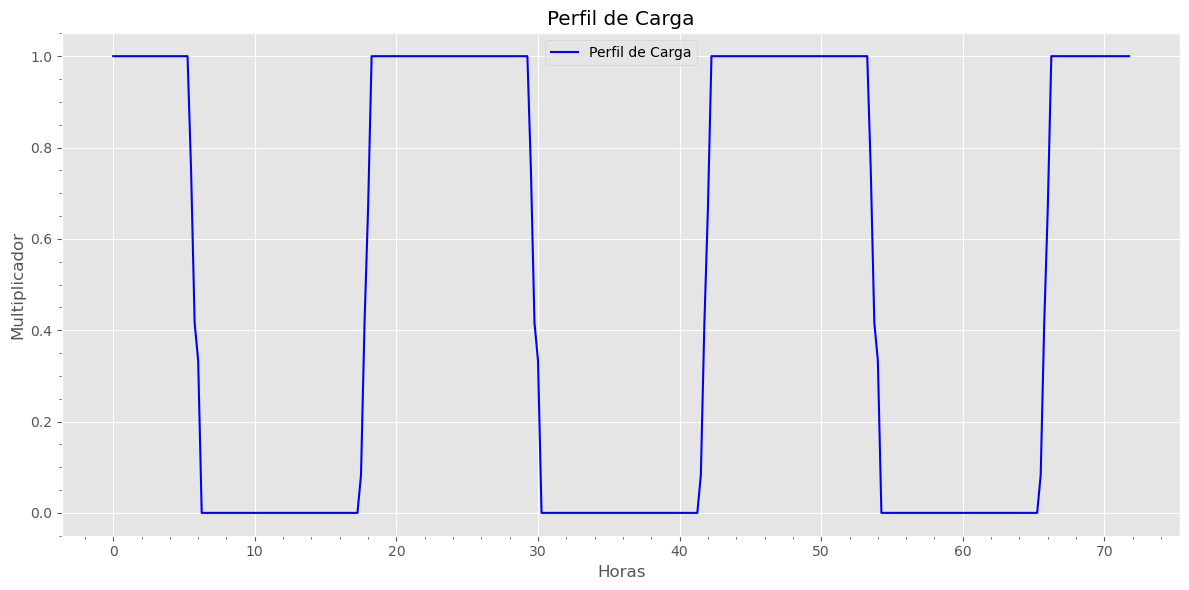

In [32]:
import matplotlib.pyplot as plt

# Dados do perfil de carga
hours = [
    0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 
    5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.0, 7.25, 7.5, 7.75, 8.0, 8.25, 8.5, 8.75, 9.0, 9.25, 9.5, 9.75, 10.0, 
    10.25, 10.5, 10.75, 11.0, 11.25, 11.5, 11.75, 12.0, 12.25, 12.5, 12.75, 13.0, 13.25, 13.5, 13.75, 14.0, 14.25, 
    14.5, 14.75, 15.0, 15.25, 15.5, 15.75, 16.0, 16.25, 16.5, 16.75, 17.0, 17.25, 17.5, 17.75, 18.0, 18.25, 18.5, 
    18.75, 19.0, 19.25, 19.5, 19.75, 20.0, 20.25, 20.5, 20.75, 21.0, 21.25, 21.5, 21.75, 22.0, 22.25, 22.5, 22.75, 
    23.0, 23.25, 23.5, 23.75, 24.0, 24.25, 24.5, 24.75, 25.0, 25.25, 25.5, 25.75, 26.0, 26.25, 26.5, 26.75, 27.0, 
    27.25, 27.5, 27.75, 28.0, 28.25, 28.5, 28.75, 29.0, 29.25, 29.5, 29.75, 30.0, 30.25, 30.5, 30.75, 31.0, 31.25, 
    31.5, 31.75, 32.0, 32.25, 32.5, 32.75, 33.0, 33.25, 33.5, 33.75, 34.0, 34.25, 34.5, 34.75, 35.0, 35.25, 35.5, 
    35.75, 36.0, 36.25, 36.5, 36.75, 37.0, 37.25, 37.5, 37.75, 38.0, 38.25, 38.5, 38.75, 39.0, 39.25, 39.5, 39.75, 
    40.0, 40.25, 40.5, 40.75, 41.0, 41.25, 41.5, 41.75, 42.0, 42.25, 42.5, 42.75, 43.0, 43.25, 43.5, 43.75, 44.0, 
    44.25, 44.5, 44.75, 45.0, 45.25, 45.5, 45.75, 46.0, 46.25, 46.5, 46.75, 47.0, 47.25, 47.5, 47.75, 48.0, 48.25, 
    48.5, 48.75, 49.0, 49.25, 49.5, 49.75, 50.0, 50.25, 50.5, 50.75, 51.0, 51.25, 51.5, 51.75, 52.0, 52.25, 52.5, 
    52.75, 53.0, 53.25, 53.5, 53.75, 54.0, 54.25, 54.5, 54.75, 55.0, 55.25, 55.5, 55.75, 56.0, 56.25, 56.5, 56.75, 
    57.0, 57.25, 57.5, 57.75, 58.0, 58.25, 58.5, 58.75, 59.0, 59.25, 59.5, 59.75, 60.0, 60.25, 60.5, 60.75, 61.0, 
    61.25, 61.5, 61.75, 62.0, 62.25, 62.5, 62.75, 63.0, 63.25, 63.5, 63.75, 64.0, 64.25, 64.5, 64.75, 65.0, 65.25, 
    65.5, 65.75, 66.0, 66.25, 66.5, 66.75, 67.0, 67.25, 67.5, 67.75, 68.0, 68.25, 68.5, 68.75, 69.0, 69.25, 69.5, 
    69.75, 70.0, 70.25, 70.5, 70.75, 71.0, 71.25, 71.5, 71.75
]
mult = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
        0.75, 0.41667185360388403, 0.333328146396116, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08332814639611603, 0.41667185360388403, 0.666671853603884, 
        1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
        1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 
        0.41667185360388403, 0.333328146396116, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08332814639611603, 0.41667185360388403, 0.666671853603884, 1.0, 1.0, 1.0, 1.0, 
        1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
        1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.41667185360388403, 
        0.333328146396116, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
        0.0, 0.08332814639611603, 0.41667185360388403, 0.666671853603884, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 
        1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(hours[:len(mult)], mult, label="Perfil de Carga", color='blue', linestyle='-')

plt.title("Perfil de Carga")
plt.xlabel("Horas")
plt.ylabel("Multiplicador")
plt.grid(True)
plt.minorticks_on()
plt.legend()
plt.tight_layout()
plt.show()


In [33]:
print(len(mult))

288


[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.75, 0.333328146396116, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08332814639611603, 0.666671853603884, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


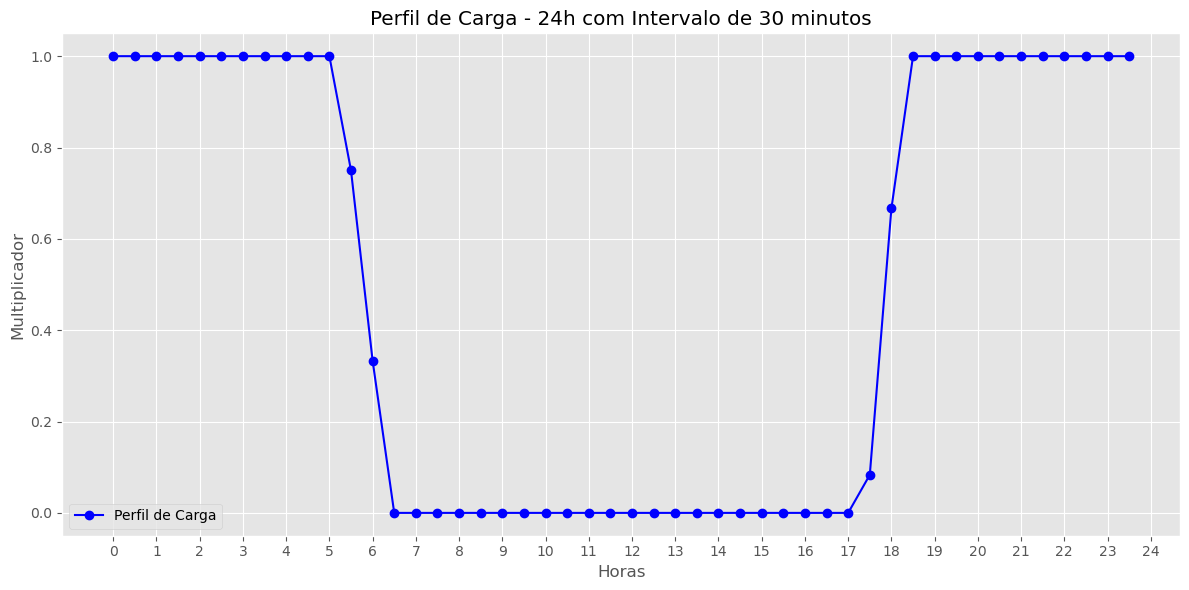

In [34]:
import matplotlib.pyplot as plt

# Dados do perfil de carga
new_hours = [i / 2 for i in range(48)]  # Gera os horários de 0 a 24 com intervalos de 30 minutos
print(new_hours)
# Pega os valores a cada 30 minutos do perfil de carga em um intervalo de 0 a 24 horas
new_mult = [mult[int(i * 2)] for i in range(48)]
print(new_mult)
    

# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(new_hours, new_mult, label="Perfil de Carga", color='blue', linestyle='-', marker='o')

plt.title("Perfil de Carga - 24h com Intervalo de 30 minutos")
plt.xlabel("Horas")
plt.ylabel("Multiplicador")
plt.grid(True)
plt.xticks(range(25))  # Mostra as horas inteiras no eixo X
plt.legend()
plt.tight_layout()
plt.show()


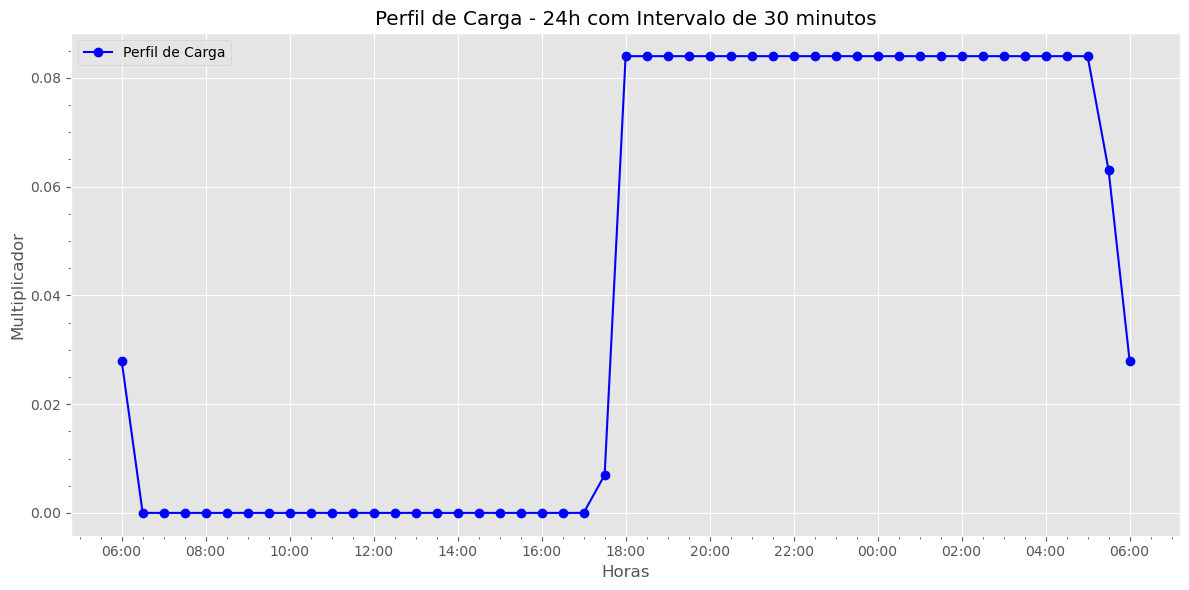

In [40]:
file = path_load + 'public_ilumination.csv'

df = pd.read_csv(file)
power_ilum = df['Ppower'][:len(time)]

# Criando o gráfico
# Criando o gráfico
plt.figure(figsize=(12, 6))
plt.plot(time, power_ilum, label="Perfil de Carga", color='blue', linestyle='-', marker='o')

# Format the x axis to display readable times
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Hour:minute format
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Can change the interval of the major ticks
plt.minorticks_on()

plt.title("Perfil de Carga - 24h com Intervalo de 30 minutos")
plt.xlabel("Horas")
plt.ylabel("Multiplicador")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
